# Goings-On Exploration

In [2]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
%matplotlib inline 


In [3]:
# to see all the columns when using head() or describe()
pd.set_option('display.max_columns',60)

In [3]:
df = pd.read_csv("aux_data/diaries_goingson_hh.csv")

In [4]:
df.shape

(5326, 12)

In [5]:
df.head()

,hh_ids,int_date,goingson_q1,goingson_q2,goingson_q3,goingson_q4,goingson_q5,goingson_q6,goingson_q7,goingson_q8,goingson_q9,goingson_q10
0,KELDL09,08oct2012,No,No,No,No,No,No,No,No,No,NaN
1,KELDL10,02oct2012,No,Yes,No,No,No,Yes,Yes,No,Yes,NaN
2,KMAKL02,12oct2012,No,No,No,No,No,No,No,No,No,NaN
3,KELDK12,02jul2013,No,No,No,No,No,No,No,No,No,No
4,KELDK31,02jul2013,No,No,No,No,No,No,No,No,No,Yes


# First I will reformat the date so that we have it in the proper format (using the date class from the module datetime).

In [6]:
from datetime import date

In [9]:
df.insert(2,"int_date2",[date(2000,1,1)]*df.shape[0])

In [10]:
df.head()

,hh_ids,int_date,int_date2,goingson_q1,goingson_q2,goingson_q3,goingson_q4,goingson_q5,goingson_q6,goingson_q7,goingson_q8,goingson_q9,goingson_q10
0,KELDL09,08oct2012,2000-01-01,No,No,No,No,No,No,No,No,No,NaN
1,KELDL10,02oct2012,2000-01-01,No,Yes,No,No,No,Yes,Yes,No,Yes,NaN
2,KMAKL02,12oct2012,2000-01-01,No,No,No,No,No,No,No,No,No,NaN
3,KELDK12,02jul2013,2000-01-01,No,No,No,No,No,No,No,No,No,No
4,KELDK31,02jul2013,2000-01-01,No,No,No,No,No,No,No,No,No,Yes


In [11]:
for index, row in df.iterrows():
    day = int(df.loc[index,"int_date"][0:2])
    year = int(df.loc[index,"int_date"][5:9])
    if df.loc[index,"int_date"][2:5] == "jan":
        month = 1
    elif df.loc[index,"int_date"][2:5] == "feb":
        month = 2
    elif df.loc[index,"int_date"][2:5] == "mar":
        month = 3
    elif df.loc[index,"int_date"][2:5] == "apr":
        month = 4
    elif df.loc[index,"int_date"][2:5] == "may":
        month = 5
    elif df.loc[index,"int_date"][2:5] == "jun":
        month = 6
    elif df.loc[index,"int_date"][2:5] == "jul":
        month = 7
    elif df.loc[index,"int_date"][2:5] == "aug":
        month = 8
    elif df.loc[index,"int_date"][2:5] == "sep":
        month = 9
    elif df.loc[index,"int_date"][2:5] == "oct":
        month = 10
    elif df.loc[index,"int_date"][2:5] == "nov":
        month = 11
    elif df.loc[index,"int_date"][2:5] == "dec":
        month = 12
    else:
        print("The date seems to be in an odd format.",dfh.loc[index,"int_date"][0:2],dfh.loc[index,"int_date"][2:5],dfh.loc[index,"int_date"][5:9])
    
    df.at[index,"int_date2"]=date(year,month,day)

In [12]:
df.head()

,hh_ids,int_date,int_date2,goingson_q1,goingson_q2,goingson_q3,goingson_q4,goingson_q5,goingson_q6,goingson_q7,goingson_q8,goingson_q9,goingson_q10
0,KELDL09,08oct2012,2012-10-08,No,No,No,No,No,No,No,No,No,NaN
1,KELDL10,02oct2012,2012-10-02,No,Yes,No,No,No,Yes,Yes,No,Yes,NaN
2,KMAKL02,12oct2012,2012-10-12,No,No,No,No,No,No,No,No,No,NaN
3,KELDK12,02jul2013,2013-07-02,No,No,No,No,No,No,No,No,No,No
4,KELDK31,02jul2013,2013-07-02,No,No,No,No,No,No,No,No,No,Yes


In [13]:
df.sort_values("int_date2", inplace=True)

In [14]:
del df["int_date"]

In [17]:
df.rename(columns={"int_date2": "int_date"}, inplace=True)
df.head()

,hh_ids,int_date,goingson_q1,goingson_q2,goingson_q3,goingson_q4,goingson_q5,goingson_q6,goingson_q7,goingson_q8,goingson_q9,goingson_q10
2287,KNBOM26,2012-09-22,No,No,No,No,No,No,NaN,NaN,No,No
293,KMOMB18,2012-09-25,No,No,Yes,No,No,No,Yes,No,Yes,NaN
2288,KNBOM02,2012-09-27,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2289,KNBOM03,2012-09-27,No,No,No,No,No,No,No,No,No,NaN
3295,KMAKL01,2012-09-28,No,No,No,No,No,No,No,No,No,NaN


## Below I will also rename the columns to have them in numerical values. This is the only way that the plotting function will work I think.

# Explanation: 
###    q1: Was stopped, arrested or had some other problem with police or city council askari.
###    q2: Needed a doctor or medicine but went without
###    q3: Felt unsafe in home or community due to crime committed nearby
###    q4: Threatened with or experienced disconnection of electricity or water for not pay
###    q5: Had some assets taken to repay a debt
###    q6: Missed an appointment or work due to lack of transport or child care
###    q7: Expected an important source of income that did not come
###    q8: Started or stopped a romantic relationship (besides marriagedivorce)
###    q9: Went to sleep hungry or without eating
###    q10: A child was sent home from school FOR ANY REASON

## Let's first rename the columns with more meaningful names.

In [21]:
df.rename(columns={"goingson_q1":"police", "goingson_q2":"doctor", "goingson_q3":"unsafe","goingson_q4":"utilities","goingson_q5":"asset_taken","goingson_q6":"miss_app","goingson_q7":"miss_inc","goingson_q8":"romantic","goingson_q9":"hungry","goingson_q10":"school_sent",}, inplace=True)

In [26]:
df.head()

,hh_ids,int_date,police,doctor,unsafe,utilities,asset_taken,miss_app,miss_inc,romantic,hungry,school_sent
2287,KNBOM26,2012-09-22,No,No,No,No,No,No,NaN,NaN,No,No
293,KMOMB18,2012-09-25,No,No,Yes,No,No,No,Yes,No,Yes,NaN
2288,KNBOM02,2012-09-27,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2289,KNBOM03,2012-09-27,No,No,No,No,No,No,No,No,No,NaN
3295,KMAKL01,2012-09-28,No,No,No,No,No,No,No,No,No,NaN


In [27]:
df.shape

(5326, 12)

In [36]:
df.replace({"Yes":1, "No":0}, inplace=True)

In [37]:
df.head()

,hh_ids,int_date,police,doctor,unsafe,utilities,asset_taken,miss_app,miss_inc,romantic,hungry,school_sent
2287,KNBOM26,2012-09-22,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
293,KMOMB18,2012-09-25,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN
2288,KNBOM02,2012-09-27,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2289,KNBOM03,2012-09-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3295,KMAKL01,2012-09-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


### When I replace a single value I get integers but when I replace to values at once I get floats. That is very weird.

In [39]:
df.dtypes

hh_ids          object
int_date        object
police         float64
doctor         float64
unsafe         float64
utilities      float64
asset_taken    float64
miss_app       float64
miss_inc       float64
romantic       float64
hungry         float64
school_sent    float64
dtype: object

In [41]:
df.insert(df.shape[1],"incidents",np.zeros(df.shape[0]))

In [57]:
type(df.loc[2287,"miss_inc"])

numpy.float64

In [61]:
for index, row in df.iterrows():
    s = 0
    for col in list(df.columns):
        if col == "hh_ids" or col == "int_date":
            continue
        elif np.isnan(row[col]):
            continue
        else:
            s += row[col]
    df.at[index,"incidents"] = s

In [63]:
df.sample(10)

,hh_ids,int_date,police,doctor,unsafe,utilities,asset_taken,miss_app,miss_inc,romantic,hungry,school_sent,incidents
3580,KMAKL17,2013-05-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
990,KELDS03,2013-03-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1969,KVIHK29,2013-07-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3944,KNBOK08,2013-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,1.0
1220,KVIHC09,2013-03-28,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0
253,KELDK18,2013-01-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0
5104,KMOMK15,2013-06-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2280,KMOMK03,2013-05-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1744,KVIHK13,2013-03-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
438,KMOMM06,2013-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
df["incidents"].describe()

count    5326.000000
mean        0.371010
std         0.706892
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         7.000000
Name: incidents, dtype: float64

In [70]:
grouped = df.groupby("hh_ids")

In [74]:
grouped["incidents"].mean().sample(10)

hh_ids
KMOMB21    0.111111
KVIHK02    0.047619
KMOMT02    0.666667
KZIMA08    0.100000
KVIHK39    0.000000
KMAKL25    0.047619
KMOMB03    0.736842
KMOMM25    0.190476
KVIHK05    0.047619
KMAKE03    0.000000
Name: incidents, dtype: float64

In [77]:
grouped["incidents"].max().sample(10)

hh_ids
KVIHC19    3.0
KELDK16    1.0
KMAKE29    1.0
KNBOK40    2.0
KMAKL28    1.0
KNBOK23    0.0
KVIHC30    2.0
KMOMK13    2.0
KELDS19    0.0
KMAKL27    1.0
Name: incidents, dtype: float64

In [80]:
grouped["incidents"].mean().sort_values(ascending = False).head()

hh_ids
KMOMT31    1.785714
KVIHC09    1.700000
KNBOM32    1.500000
KNBOK32    1.466667
KMOMK01    1.300000
Name: incidents, dtype: float64

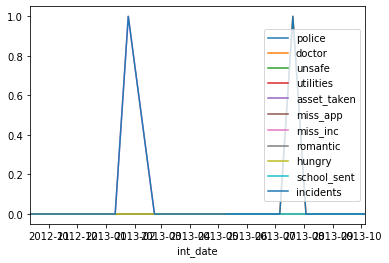

In [76]:
df[df["hh_ids"]=="KMOMB21"].plot(x="int_date")

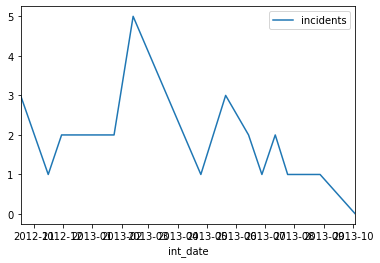

In [82]:
df[df["hh_ids"]=="KMOMT31"].plot(x="int_date",y="incidents")